In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import sys
sys.path.append('./classes/')
sys.path.append('./utils/')

from AndersonGraph import AndersonGraph
from utils.plotting import plot_lattice_pdf
from utils.animations import animate_lattice_pdf, animate_random_graph_pdf
from utils.plot_ipr import plot_ipr_evolution, plot_ipr_vs_W, plot_ipr_vs_p 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Time Evolution & Anderson Localizaton on Graphs

## 1D Periodic Lattice (Ring)

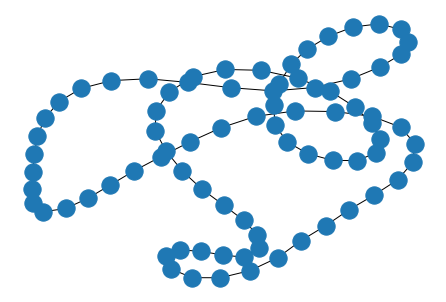

In [8]:
n = 80
psi_0 = np.zeros(n)
psi_0[n//2] = 1

ring = nx.grid_graph(dim=[80], periodic=True)
nx.draw(ring)

anderson_ring = AndersonGraph(graph=ring, psi_0=psi_0, eps_range=[-1, 1], t_hop=1)

c:\Users\parth\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


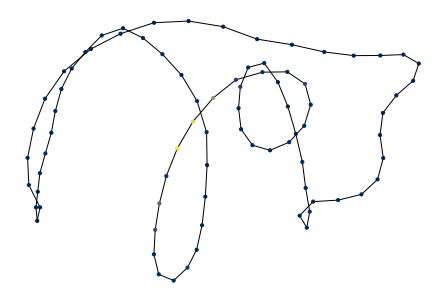

In [9]:
anderson_ring.plot_density(t=17)

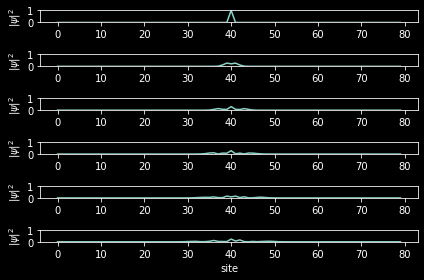

In [10]:
# plot the ring PDF as snapshots in time
fig, axs = plt.subplots(6)
for i, ax in enumerate(axs):
    psi_t = anderson_ring.psi_at_t(i)
    density = np.real(np.multiply(psi_t.conj(), psi_t))
    ax.plot(density)
    
    ax.set_ylim(0, 1)
    ax.set_ylabel('$|\psi|^2$')


plt.xlabel('site')
plt.tight_layout()

## 2D Periodic Lattice (Torus)

In [16]:
n = 30
lattice = nx.grid_graph(dim=[n, n], periodic=True)
psi_0 = np.zeros(n**2)
psi_0[n**2//2] = 1

anderson_lattice = AndersonGraph(graph=lattice, psi_0=psi_0, eps_range=[-1, 1], t_hop=1)

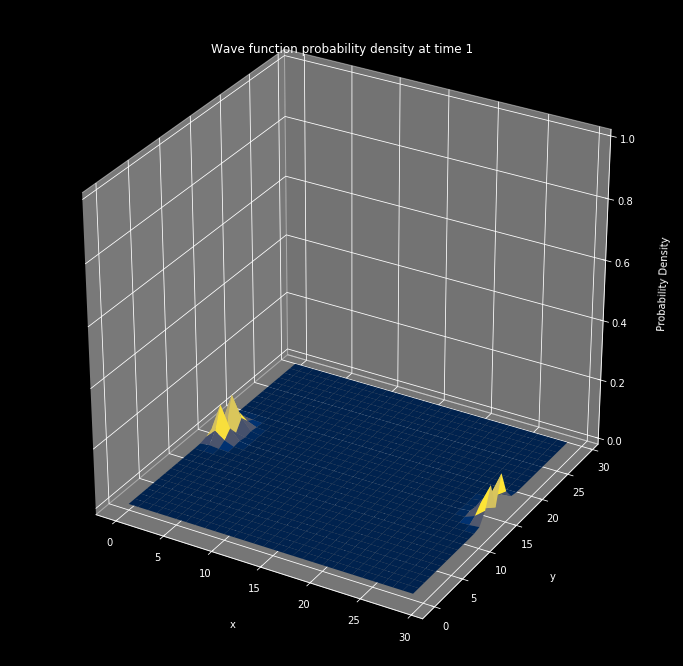

In [17]:
from mpl_toolkits.mplot3d import Axes3D
plot_lattice_pdf(anderson_lattice=anderson_lattice, time=1)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


saving animation to plots/lattice_animation_size_30_tmax_20_W_1.gif


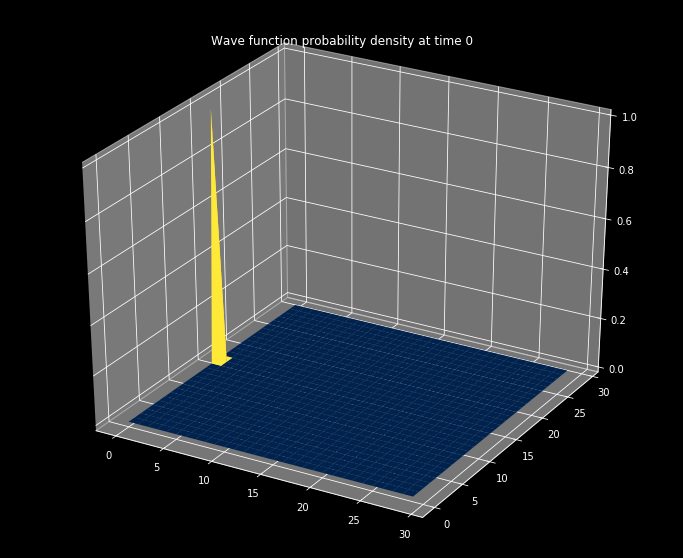

In [19]:
animate_lattice_pdf(anderson_lattice=anderson_lattice, t_max=20)

## Random Graphs

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


saving animation to plots/random_graph_animation_n_100_tmax_40_W_1_p_0.03.gif


c:\Users\parth\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


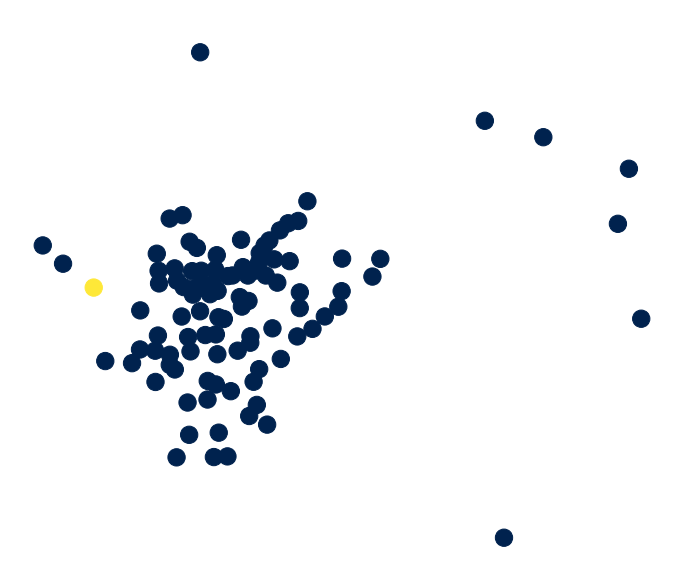

In [20]:
n = 100
psi_0 = np.zeros(n)
psi_0[np.random.randint(n)] = 1

p = 0.03
random_graph = nx.erdos_renyi_graph(n, p)

anderson_random_graph = AndersonGraph(graph=random_graph, psi_0=psi_0, eps_range=[-1, 1], t_hop=1)

animate_random_graph_pdf(anderson_random_graph=anderson_random_graph, t_max=40, p=p)

# IPR Plots

## 1D Periodic Lattice (Ring)

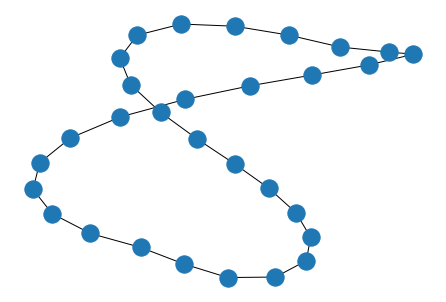

In [21]:
ring = nx.grid_graph(dim=[30], periodic=True)
nx.draw(ring)

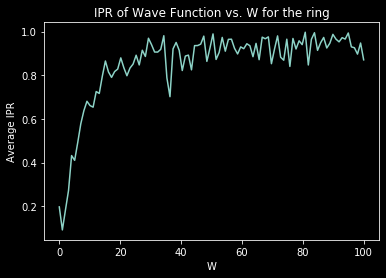

In [22]:
plot_ipr_vs_W(graph=ring, time=100, site_num=2, t_hop=1, W_max=100, num_trials=10, graph_name='ring')

In [ ]:
plot_ipr_evolution(anderson_graph=anderson_ring, t_max=100, nt=100)

## 2D Periodic Lattice (Torus)

In [ ]:
torus = nx.grid_graph(dim=[30, 30], periodic=True)
plot_ipr_vs_W(graph=torus, time=100, site_num=400, t_hop=1, W_max=100, num_trials=2, graph_name='torus')

## Random Graphs

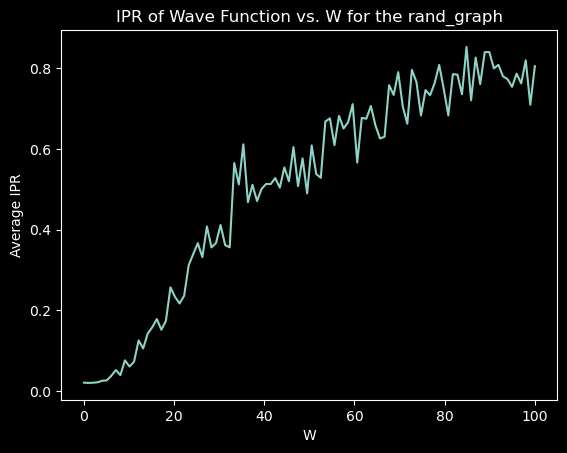

In [42]:
n = 100
#psi_0 = np.zeros(n)
#x = np.random.randint(n)
#psi_0[x] = 1
p = 0.1

random_graph = nx.erdos_renyi_graph(n, p)
plot_ipr_vs_W(graph=random_graph, time=1000, site_num=50, t_hop=1, W_max=100, num_trials=20, graph_name='rand_graph')

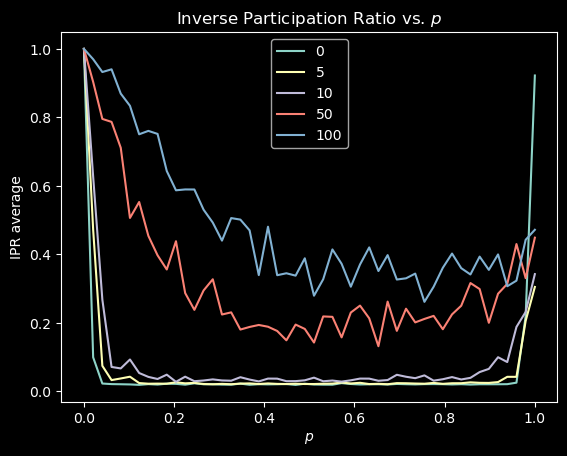

In [43]:
n = 100
psi_0 = np.zeros(n)
x = np.random.randint(n)
psi_0[x] = 1
p = 0.1

plot_ipr_vs_p(num_pts=50, num_sites=100, time=1000, W_vals=[0, 5, 10, 50, 100], psi_0=psi_0, t_hop=1, num_trials=10)